# Aproximación polinomial

Se utiliza para encontrar valores que no se encuentran tabulados; por ejemplo, se cuenta con los datos de temperatura de ebullición para la acetona a diferentes presiones:


|**Puntos**| 0  | 1    | 2    | 3    |
|:---       |--- |---   |---   |---   |
|$T(ºC)$   |56.5| 113.0| 181.0| 214.5|
|$P(atm)$  | 1  | 5    | 20   | 40   |

Se desea saber la temperatura de ebullición de la acetona a $2\,atm$.

Considerando que el comportamiento de ebullución de la acetona se comporta de forma lineal en el intervalo $(0\,atm-5\,atm)$ que deseamos encontrar la temperatura, se puede resolver de la forma siguiente:

**Paso 1:** considerando que la temperatura se comporta de forma lineal, se tiene que:

$$T(P)=a_0 + a_1\,P $$

**Paso 2:** se toman los puntos 0 y 1, porque entre esos puntos se encuentra la temperatura a la presión que se desea.

$$\begin{align*}
56.5 &= a_0 + 1\,a_1\, \text{punto 0}\\
113.0 &= a_0 + 5\,a_1\, \text{punto 1}
\end{align*}$$

**Paso 3:** resolviendo el sistema se tiene que $a_0 = 42.4$ y $a_1 = 14.13$, por tanto, la ecuación que describe la temperatura en función de la presión en el intervalo de $0\,atm$ a $5\,atm$ es:

$$T(P)=42.4 + 14.13\,P $$

**Paso 4:** evaluar la ecuación en $2\,atm$ para encontrar la temperatura de ebullición deseada.

In [1]:
T = lambda P: 42.4 + 14.13*P    # Creamos una funcón lambda con la ecuación obtenida 

In [2]:
T(2)    # Evaluamos la función en 2 atm 

70.66

Al graficar los datos tabulados y los datos que genera la ecuación que describe la temperatura en función de la presión en el intervalo de $0\,atm$ a $5\,atm$, se puede observar que la aproximación sólo funciona en el intervalo para el cual se construyó.

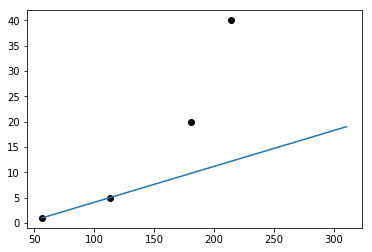

In [16]:
import matplotlib.pyplot as plt
import numpy as np
Temperatura = [56.5, 113.0, 181.0, 214.5]
Presion = [1, 5, 20, 40]
p = np.arange(1, 20)
plt.plot(Temperatura,Presion, "ko")
plt.plot(T(p),p)

plt.show()

Si se desea encontrar una aproximación mejor a la anterior $(70.66\,ºC)$, se puden usar más puntos de los datos tabulados, por ejemplo, los puntos $0,1$ y $2$; y aproximar el comportamiento de la temperatura de forma cuadrática:

$$T(P) = a_0 + a_1\,P + a_2\,P^2$$

**Paso 1:** considerando los puntos $0,1$ y $2$, se llega a un sistema de ecuaciones no lineales ¿recuerdan las notas de sistemas de ecuaciones no lineales?, aquí se ocupa:

$$\begin{align*}
56.5  &= a_0 + a_1\,1 + a_2\,1^2 \, \text{punto o}\\
113.0 &= a_0 + a_1\,5 + a_2\,5^2 \, \text{punto 1}\\
181.0 &= a_0 + a_1\,20 + a_2\,20^2 \, \text{punto 2}
\end{align*}$$

**Paso 2:** Resolver el sistema de ecuaciones no lineales.

In [20]:
"""
Vamos a utilizar el método fsolve de la biblioteca scipy para resolver el sistema de ecuaciones
no lineales
"""

from scipy.optimize import fsolve    # Cargamos el método fsolve

"""
Creamos una función que contenga el sistema de ecuaciones no lineales (SNL) 
"""

def SNL(eqs):
    a0, a1, a2 = eqs
    return (a0 + a1 + a2 - 56.5, 
            a0 + 5*a1 + 25*a2 - 113.0, 
            a0 + 20*a1 + a2*20**2 - 181.0)

"""
Llamamos al método fsolve y le enviamos la función (SNL) con las ecuaciones no lineales, y las 
condiciones iniciales (20,10,1) para cada una de las ecuaciones.

La solución se va a almacenar en a0, a1 y a2
"""

a0, a1, a2 = fsolve(SNL,(20,10,1))    

In [21]:
print a0, a1, a2    # Imprimimos la solución

39.85087719298245 17.153947368421058 -0.504824561403509


In [22]:
print SNL((a0,a1,a2))    # Evaluamos las ecuaciones en el resultado obtenido por fsolve

"""
Como se puede observar, al evaluar el SNL con las solución dada por fsolve, las funciones se 
acercan a cero.
"""

(0.0, 1.4210854715202004e-14, 2.842170943040401e-14)


La ecuación que describe la temperatura en función de la presión en el intervalo de $0\,atm$ a $20\,atm$ es:

$$T(P)=39.85 + 17.15\,P - 0.5048\,P^2 $$

**Paso 4:** evaluar la ecuación en 2 atm. 

In [23]:
T = lambda P: 39.85 + 17.15*P - 0.5048*P**2
T(2)

72.13080000000001